<a href="https://colab.research.google.com/github/Vishwaak/Time-for-Machine/blob/master/Validation_and_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torchvision import datasets, transforms
import helper
import numpy as np

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the training data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [0]:
from torch import nn, optim
import torch.nn.functional as F


In [0]:
#Network model.
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784 , 256)
    self.fc2 = nn.Linear(256 , 128)
    self.fc3 = nn.Linear(128 , 64)
    self.fc4 = nn.Linear(64 , 10)
    
  def forward(self ,x):
    x = x.view(x.shape[0] , -1)
    
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.log_softmax(self.fc4(x) , dim =1)
    
    return x
     
    
   
  

In [0]:
model = Classifier()

images, labels = next(iter(testloader))
# Get the class probabilities
ps = torch.exp(model(images))
# Make sure the shape is appropriate, we should get 10 class probabilities for 64 examples
print(ps.shape)

torch.Size([64, 10])


In [0]:
top_p, top_class = ps.topk(1, dim=1)
# Look at the most likely classes for the first 10 examples
print(top_class[:10,:])

tensor([[8],
        [8],
        [8],
        [8],
        [2],
        [2],
        [2],
        [2],
        [8],
        [8]])


In [0]:
equals = top_class == labels.view(*top_class.shape)

In [0]:
accuracy = torch.mean(equals.type(torch.FloatTensor))
print(f'Accuracy: {accuracy.item()*100}%')

Accuracy: 9.375%


In [0]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.003)

epochs = 30
steps = 0

train_losses, test_losses = [] , []
for e in range(epochs):
  running_loss = 0
  for images , labels in trainloader:
    
    optimizer.zero_grad()
    
    log_ps = model(images)
    loss = criterion(log_ps , labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    
  else:
      test_loss = 0
      accuracy = 0
      
      with torch.no_grad():
        for images , labels in testloader:
          log_ps = model(images)
          test_loss += criterion(log_ps , labels)
          
          ps = torch.exp(log_ps)
          top_p , top_class = ps.topk(1 , dim=1)
          equals = top_class == labels.view(*top_class.shape)
          accuracy += torch.mean(equals.type(torch.FloatTensor))
    
  train_losses.append(running_loss/len(trainloader))
  test_losses.append(test_loss/len(testloader))
    
  print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))
    
    
    

Epoch: 1/30..  Training Loss: 0.520..  Test Loss: 0.443..  Test Accuracy: 0.841
Epoch: 2/30..  Training Loss: 0.393..  Test Loss: 0.448..  Test Accuracy: 0.836
Epoch: 3/30..  Training Loss: 0.359..  Test Loss: 0.408..  Test Accuracy: 0.852
Epoch: 4/30..  Training Loss: 0.335..  Test Loss: 0.415..  Test Accuracy: 0.856
Epoch: 5/30..  Training Loss: 0.316..  Test Loss: 0.376..  Test Accuracy: 0.861
Epoch: 6/30..  Training Loss: 0.302..  Test Loss: 0.374..  Test Accuracy: 0.869
Epoch: 7/30..  Training Loss: 0.292..  Test Loss: 0.362..  Test Accuracy: 0.876
Epoch: 8/30..  Training Loss: 0.284..  Test Loss: 0.366..  Test Accuracy: 0.874
Epoch: 9/30..  Training Loss: 0.275..  Test Loss: 0.378..  Test Accuracy: 0.868
Epoch: 10/30..  Training Loss: 0.266..  Test Loss: 0.357..  Test Accuracy: 0.876
Epoch: 11/30..  Training Loss: 0.261..  Test Loss: 0.358..  Test Accuracy: 0.873
Epoch: 12/30..  Training Loss: 0.253..  Test Loss: 0.365..  Test Accuracy: 0.878
Epoch: 13/30..  Training Loss: 0.247.

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

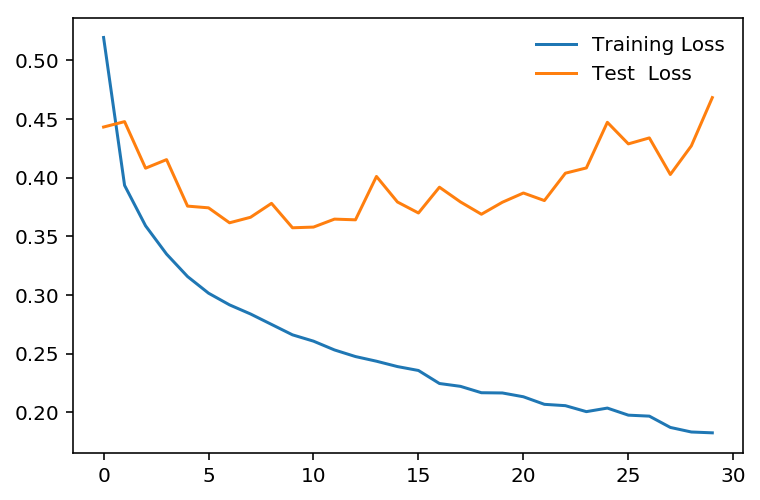

In [0]:
plt.plot(train_losses , label = 'Training Loss')
plt.plot(test_losses , label='Test  Loss')
plt.legend(frameon = False)

In [0]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784 , 256)
    self.fc2 = nn.Linear(256 , 128)
    self.fc3 = nn.Linear(128 , 64)
    self.fc4 = nn.Linear(64,10)
    
    self.dropout = nn.Dropout(p=0.2)
    
  def forward(self ,x):
    x = x.view(x.shape[0] , -1)
  
    x = self.dropout(F.relu(self.fc1(x)))
    x = self.dropout(F.relu(self.fc2(x)))
    x = self.dropout(F.relu(self.fc3(x)))
  
    x = F.log_softmax(self.fc4(x) , dim =1)
  
    return x


In [0]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 40
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        optimizer.zero_grad()
        
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/40..  Training Loss: 0.601..  Test Loss: 0.479..  Test Accuracy: 0.826
Epoch: 2/40..  Training Loss: 0.488..  Test Loss: 0.458..  Test Accuracy: 0.835
Epoch: 3/40..  Training Loss: 0.450..  Test Loss: 0.440..  Test Accuracy: 0.841
Epoch: 4/40..  Training Loss: 0.438..  Test Loss: 0.426..  Test Accuracy: 0.851
Epoch: 5/40..  Training Loss: 0.424..  Test Loss: 0.422..  Test Accuracy: 0.851
Epoch: 6/40..  Training Loss: 0.411..  Test Loss: 0.384..  Test Accuracy: 0.860
Epoch: 7/40..  Training Loss: 0.408..  Test Loss: 0.384..  Test Accuracy: 0.864
Epoch: 8/40..  Training Loss: 0.397..  Test Loss: 0.392..  Test Accuracy: 0.862
Epoch: 9/40..  Training Loss: 0.393..  Test Loss: 0.388..  Test Accuracy: 0.866
Epoch: 10/40..  Training Loss: 0.391..  Test Loss: 0.386..  Test Accuracy: 0.862
Epoch: 11/40..  Training Loss: 0.385..  Test Loss: 0.384..  Test Accuracy: 0.868
Epoch: 12/40..  Training Loss: 0.374..  Test Loss: 0.401..  Test Accuracy: 0.865
Epoch: 13/40..  Training Loss: 0.382.

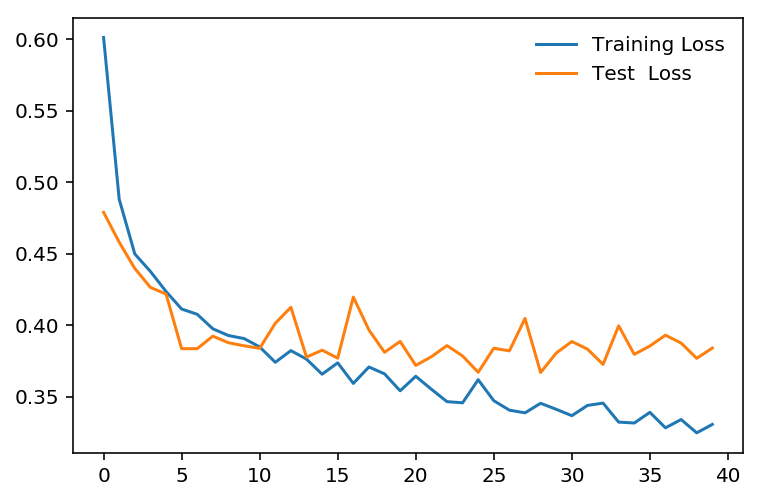

In [0]:
plt.plot(train_losses , label = 'Training Loss')
plt.plot(test_losses , label='Test  Loss')
plt.legend(frameon = False)

In [0]:
model.eval()

detaiter = iter(testloader)

images , labels = detaiter.next()
img = images[1]

img = img.view(1,784)

with torch.no_grad():
  output = model.forward(img)
  
ps = torch.exp(output)



In [0]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

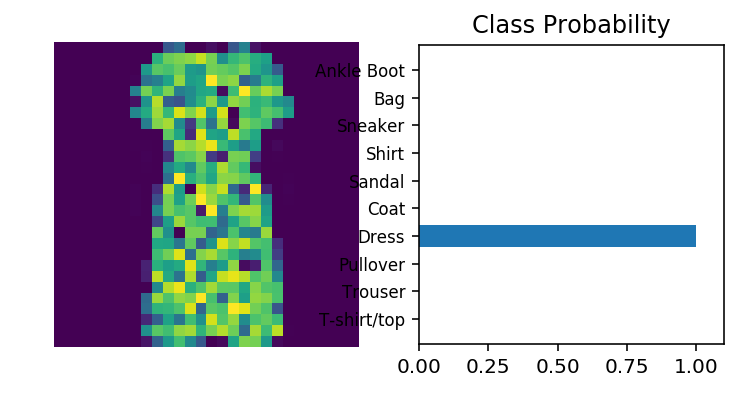

In [0]:
view_classify(img.view(1 , 28 , 28) , ps , version='Fashion')